In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')
plt.style.use('ggplot')
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
import re

In [2]:
term_deposit=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')
term_deposit

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
term_deposit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [4]:
term_deposit.drop(columns=['ID'])

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [5]:
term_deposit.subscribed.value_counts(normalize=True)

subscribed
no     0.882611
yes    0.117389
Name: proportion, dtype: float64

In [6]:
term_deposit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [7]:
term_deposit.job=np.where(term_deposit.job=='admin.','admin',term_deposit.job)

In [8]:
features,target=term_deposit.copy().drop(columns=['subscribed','ID'],axis=1),term_deposit.copy().subscribed

In [9]:
features

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,56,admin,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure


In [10]:
for col in features.select_dtypes('object'):
    print(features[col].value_counts(normalize=True),'\n')

job
blue-collar      0.216197
management       0.209783
technician       0.167694
admin            0.114734
services         0.091731
retired          0.049736
self-employed    0.035485
entrepreneur     0.031851
unemployed       0.028597
housemaid        0.027617
student          0.020065
unknown          0.006509
Name: proportion, dtype: float64 

marital
married     0.603375
single      0.281922
divorced    0.114703
Name: proportion, dtype: float64 

education
secondary    0.512655
tertiary     0.293898
primary      0.151926
unknown      0.041521
Name: proportion, dtype: float64 

default
no     0.981515
yes    0.018485
Name: proportion, dtype: float64 

housing
yes    0.555629
no     0.444371
Name: proportion, dtype: float64 

loan
no     0.837868
yes    0.162132
Name: proportion, dtype: float64 

contact
cellular     0.645338
unknown      0.289980
telephone    0.064682
Name: proportion, dtype: float64 

month
may    0.305527
jul    0.153063
aug    0.136917
jun    0.118115
nov    0.

In [11]:
for col in features.select_dtypes('number'):
    print(features[col].describe(),'\n')

count    31647.000000
mean        40.957247
std         10.625134
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64 

count     31647.000000
mean       1363.890258
std        3028.304293
min       -8019.000000
25%          73.000000
50%         450.000000
75%        1431.000000
max      102127.000000
Name: balance, dtype: float64 

count    31647.000000
mean        15.835466
std          8.337097
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64 

count    31647.000000
mean       258.113534
std        257.118973
min          0.000000
25%        104.000000
50%        180.000000
75%        318.500000
max       4918.000000
Name: duration, dtype: float64 

count    31647.000000
mean         2.765697
std          3.113830
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         6

In [12]:
model_df=None
for col in features.select_dtypes('object'):
    x=pd.get_dummies(data=features[col],
                     drop_first=True,
                     prefix=col).astype(np.int64)
    if model_df is None:
        model_df=x
    else:
        model_df=pd.concat([model_df,x],axis=1,join='inner')
model_df

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
31643,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
31644,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
31645,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [13]:
num_feature_df=features.select_dtypes('number')
model_df=pd.concat([model_df,num_feature_df],axis=1,join='inner')
model_df

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,56,1933,19,44,2,-1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,31,3,20,91,2,-1,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,1,27,891,18,240,1,-1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,57,3287,22,867,1,84,3
4,0,0,0,0,0,0,0,0,1,0,...,0,0,1,31,119,4,380,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,0,0,0,1,0,0,0,0,0,0,...,0,0,1,29,0,12,116,2,-1,0
31643,0,0,0,1,0,0,0,0,0,0,...,0,0,1,53,380,5,438,2,-1,0
31644,0,0,0,1,0,0,0,0,0,0,...,0,0,1,32,312,7,37,3,-1,0
31645,0,0,0,0,0,0,0,0,1,0,...,0,0,0,57,225,15,22,7,337,12


In [14]:
col_to_drop=[]
pattern=re.compile(pattern='_unknown')
for col in model_df.columns:
    if pattern.search(col):
        col_to_drop.append(col)

model_df=model_df.drop(columns=col_to_drop)
model_df

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_sep,poutcome_other,poutcome_success,age,balance,day,duration,campaign,pdays,previous
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,56,1933,19,44,2,-1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,31,3,20,91,2,-1,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,27,891,18,240,1,-1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,57,3287,22,867,1,84,3
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,31,119,4,380,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,0,0,0,1,0,0,0,0,0,0,...,0,0,0,29,0,12,116,2,-1,0
31643,0,0,0,1,0,0,0,0,0,0,...,0,0,0,53,380,5,438,2,-1,0
31644,0,0,0,1,0,0,0,0,0,0,...,0,0,0,32,312,7,37,3,-1,0
31645,0,0,0,0,0,0,0,0,1,0,...,0,0,0,57,225,15,22,7,337,12


In [15]:
target=np.where(target=='yes',1,0)

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(model_df,
                                               target,
                                               test_size=0.2,
                                               random_state=42,
                                               stratify=target,
                                               shuffle=True)
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [17]:
auc_dict={}
for i in np.linspace(start=1,stop=1000,num=101).astype(np.int64):
    model=RandomForestClassifier(random_state=i)
    cv_score=cross_val_score(estimator=model,
                    X=X_train_scaled,
                    y=Y_train,
                    cv=5,
                    n_jobs=-1,
                    scoring='roc_auc').mean()
    model.fit(X_train_scaled,Y_train)
    pred_proba=model.predict_proba(X_test_scaled)[:,-1]
    test_auc=roc_auc_score(y_true=Y_test,y_score=pred_proba)
    auc_dict[i]=[cv_score,test_auc,abs(cv_score-test_auc)]

best_rs=min(auc_dict,key=lambda x:auc_dict[x][-1])
print(f'Best random state {best_rs}')
print(f'Best test state {auc_dict[best_rs][-2]}')
print(f'Best cross val score {auc_dict[best_rs][0]}')

Best random state 230
Best test state 0.9237769808349078
Best cross val score 0.9149788281091509


In [24]:
rf_model=RandomForestClassifier(random_state=best_rs,
                             class_weight='balanced')
rf_model.fit(X=X_train_scaled,
          y=Y_train)
roc_auc_score(y_true=Y_test,
              y_score=rf_model.predict_proba(X_test_scaled)[:,-1])

0.9277657636779864

In [25]:
print(classification_report(y_true=Y_test,
                      y_pred=rf_model.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      5587
           1       0.70      0.29      0.41       743

    accuracy                           0.90      6330
   macro avg       0.81      0.64      0.68      6330
weighted avg       0.89      0.90      0.88      6330



In [35]:
sample_weight=np.where(Y_train==0,1/(1-Y_train.mean()),1/Y_train.mean())
gbm_model=GradientBoostingClassifier(random_state=best_rs)
gbm_model.fit(X=X_train_scaled,
              y=Y_train,
              sample_weight=sample_weight)

print(f'train auc: {roc_auc_score(y_true=Y_train,y_score=gbm_model.predict_proba(X_train_scaled)[:,-1])}')
print(f'Test auc: {roc_auc_score(y_true=Y_test,y_score=gbm_model.predict_proba(X_test_scaled)[:,-1])}')

train auc: 0.924960329375356
Test auc: 0.9207005977392722


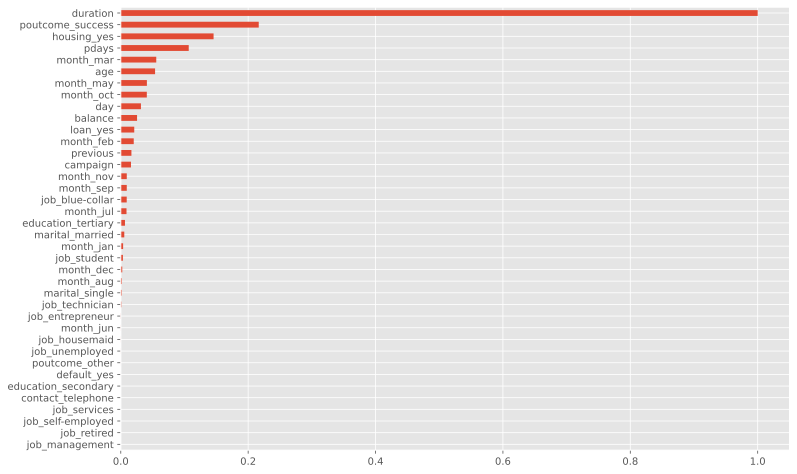

In [72]:
feature_imp_df=pd.Series(data=gbm_model.feature_importances_,
                            index=model_df.columns.values).sort_values()
plt.figure(figsize=(12,8))
(feature_imp_df/feature_imp_df.max()).plot.barh();

In [75]:
feature_imp_df.index.values

array(['job_management', 'job_retired', 'job_self-employed',
       'job_services', 'contact_telephone', 'education_secondary',
       'default_yes', 'poutcome_other', 'job_unemployed', 'job_housemaid',
       'month_jun', 'job_entrepreneur', 'job_technician',
       'marital_single', 'month_aug', 'month_dec', 'job_student',
       'month_jan', 'marital_married', 'education_tertiary', 'month_jul',
       'job_blue-collar', 'month_sep', 'month_nov', 'campaign',
       'previous', 'month_feb', 'loan_yes', 'balance', 'day', 'month_oct',
       'month_may', 'age', 'month_mar', 'pdays', 'housing_yes',
       'poutcome_success', 'duration'], dtype=object)

In [79]:
feature_imp_df.index.values[-15:]

array(['month_nov', 'campaign', 'previous', 'month_feb', 'loan_yes',
       'balance', 'day', 'month_oct', 'month_may', 'age', 'month_mar',
       'pdays', 'housing_yes', 'poutcome_success', 'duration'],
      dtype=object)